In [12]:
import agama
import arepo
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from joblib import Parallel, delayed
import matplotlib as mpl
from scipy.optimize import minimize

from numba import njit

agama.setUnits(mass=1E10, length=1, velocity=1)

'Length unit: 1 Kpc, velocity unit: 1 km/s, time unit: 977.793 Myr, mass unit: 1e+10 Msun, gravitational constant: 43009.2'

In [2]:
def read_agama_pot(idx, name, lvl):
    base = '/n/home01/abeane/starbar/plots/agama_pot/data/'
    fname = base + 'pot_' + name + '-' + lvl + '/pot_' + name + '-' + lvl + '.' + str(idx) + '.txt'
    return agama.Potential(fname)

In [19]:
pot = read_agama_pot(200, 'phantom-vacuum-Sg20-Rc3.5', 'lvl3')
pot = read_agama_pot(500, 'Nbody', 'lvl3')


In [4]:
Rlist = np.linspace(0, 25, 1000)
pos = np.array([[R, 0, 0] for R in Rlist])
acc = pot.force(pos)

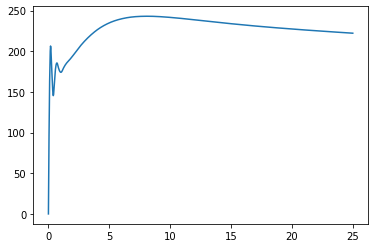

In [5]:
vcsq = - Rlist * acc[:,0]
plt.plot(Rlist, np.sqrt(vcsq))
plt.show()

In [7]:
R = 8
pot.force(R, 0, 0)

array([-7381.70567979,    -0.        ,    -0.        ])

In [20]:
def compute_vc(R, pot):
    acc = pot.force(R, 0, 0)
    vcsq = - R * acc[0]
    return np.sqrt(vcsq)

def _to_minimize(R, pot, omega_p):
    vc = compute_vc(R, pot)
    omega = vc / R
    return np.abs(omega - omega_p)

def compute_RCR(pot, omega_p, Rguess=6):
    ans = minimize(_to_minimize, Rguess, args=(pot, omega_p))
    
    return ans.x


In [38]:
RCR= compute_RCR(pot, 

In [39]:
RCR

array([3.75030116])